In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Importing the csv 

In [2]:
raw_csv_data = pd.read_csv(r'C:\Users\User\Desktop\Index2018.csv')
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


#### Examining the Data

In [5]:
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [6]:
# we use datetime column as an index in Time -Series Data.
# Other columns represents the time series data for the market closing such as : S & P 500 (USA) : - spx , DAX 30 (Germany) - dax, FTSE 100 (London) - ftse , NIKKEI (Japan) - nikkei 
# Each market index is a portfolio of the most traded pulic industry .

# To understand the data in more detail, we will use describe method 

df_comp.describe()

# describe method does not consider date - time column because it is not a numeric column.

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


##### spx has lower average and max value of spx is even lower than min value of ftse and nikkei but standard deviation of spx is less compare to others.  


In [7]:
# Determining Not Available (NA) elements: isna(), the fuction return TRUE if there is any NA value or vice versa.

df_comp.isna()


,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [8]:
# 1 = True , 0 = False 
df_comp.isna().sum() # this will count the number of NA or NOT NA values 

# this shows that zero NA values in any column

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

#### Plotting the Data 

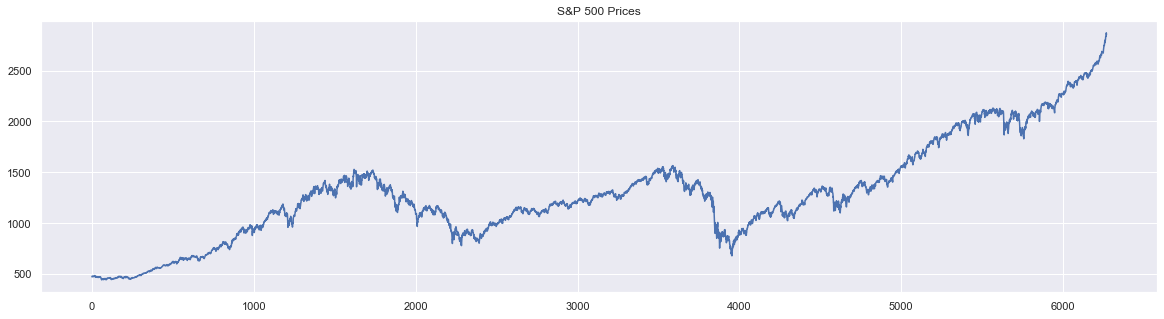

In [9]:
df_comp.spx.plot(figsize = (20, 5), title = 'S&P 500 Prices')
plt.show()

# In proper time-series, the x - axis would show the corresponding dates for each period.

##### Observe how price of the S&P fluctuates, their periods are booming growth followed by sharp falls.The first two large peaks followed by large large turbulence present obviously the .com and housing market bubble respectively.
##### We should also plot the other index to see their patterns ....

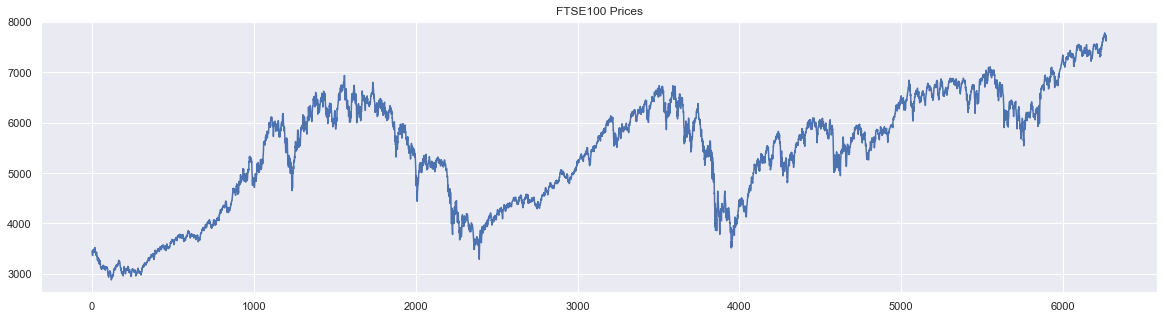

In [10]:
df_comp.ftse.plot(figsize = (20, 5), title = 'FTSE100 Prices')
plt.show()

#### shows the similar pattern for the two first two bubbles we mentioned earlier. while analyzing different data series we need to compare them. To do so , we should plot the different index on the samw plot.
#### we can achieve this by plotting both series in the same cell.

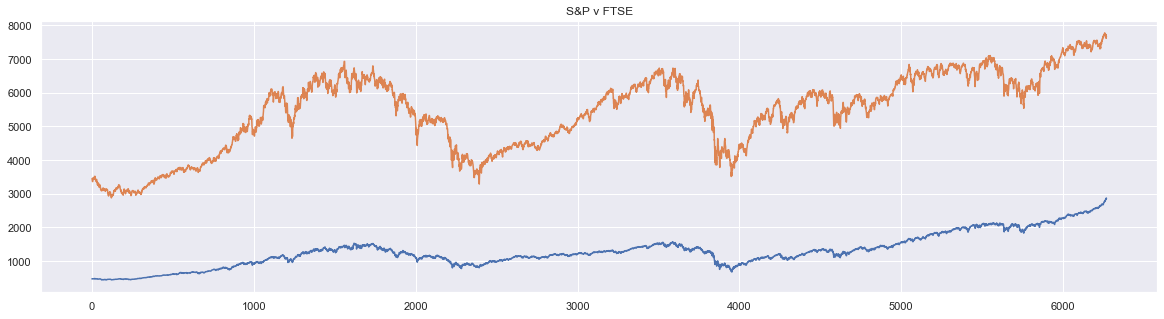

In [11]:
df_comp.spx.plot(figsize = (20, 5), title = 'S&P 500 Prices')
df_comp.ftse.plot(figsize = (20, 5), title = 'FTSE100 Prices')
plt.title('S&P v FTSE')
plt.show()

#### FTSE values are much greater than the S&P ones but the two still moves similarily. One major difference is that S&P looks much flatter than the FTSE, would suggest that S&P is much stable.
#### However, this analysis is misleading, the graph of S&P looks much more compact because of the magnitude with which values for the S&P and FTSE changed. The S&P and The FTSE have vastly different magnitudes.
#### This is why the reason, Time Series analysis involves compounded returns along with the prices. So, far we plotted prices against time but what what we have wanted the density of the data and which values is likeli to occur , to do so we should construct quartile - quartile or Q-Q plot. 

In [12]:
#### The QQ Plot : is a tool used to determine whether a data set is distributed a certain way. QQ plot usually showcases how the data fits a Normal Distributon.
import scipy.stats
import pylab


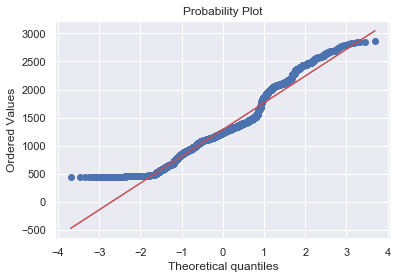

In [13]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

#### QQ plot takes all the values a variable can take, and arranges them in accending order. The Y-axis expresses the Price with the highest one in the top and lowest one in the bottom. The X - axis represents the Theoretical Quantiles. 
#### Another explaination for the ladder (blue line) is how many standard deviations away from the mean these values are. The red diaginal line represents what the data points should follow, if they are NORMALLY DISTRIBUTED, we see that it is not really the case since we have more values araound the 500 mark than we should. Therefore, the data is not normally distributed and we cannot use the allegant statistics of normal distributions to make successful forecast. However, this is we usually expect from time - series  data.
#### Now, we are familiar with the data, so we will convert our dataframe into a Time series ...

In [14]:
# Time is important for time series analysis and transform a data frame into a time series.
# To begin with let's convert the date column into a date type.

df_comp.describe() # since the time is not numeric so it is not included in the summary statistics. 

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [15]:
df_comp.date.describe() # summary statistics of date column is very limited , do not include the top and last value. the top date is misleading as it does'nt hold the top value, istead it is completely arbitrary.
# All the date values are 1 , any single data holds a "top" value and the method randomly selects one to display. 

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [16]:
# convert dates to datetime 
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True) # Assumes we are plugging in a string in a mm/dd/yyyy form . our data is saved in a dd/mm/yyyy format

In [17]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [18]:
df_comp.date.describe()

<ipython-input-18-68f1cb45f47c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

##### Observe the change in summary statistics . we can use as index for further analysis ..

##### Each value should be correspond to a time period and we often wish to examine specific chunks of data between two concrete dates.
##### for example analysis of recession by layman brothers , separating the data before and after september 15th 2008 , we need to use the associated time periods as indices.

#### Setting the index 

In [19]:
df_comp.set_index('date', inplace = True) 

In [20]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


##### No integer value in index instead the date value as an index ....

In [21]:
df_comp.date.describe()

AttributeError: 'DataFrame' object has no attribute 'date'

##### Reason for above error: Once "date" becomes an index, we no longer save its values as a separate attribute in the data frame....

##### Time series requires constant frequency : Time series frequency 

#### Setting the Desired Frequency 

In [22]:
df_comp = df_comp.asfreq('d') # The values this argument can take are specific letters of the alphabet putting in the single quotation mark such as 'h' - hourly, 'w'- weekly, 'd'- daily , 'm'- monthly
# Data measured once per year is "annual", rather than 'yearly', so we use 'a', instead of 'y'.

In [23]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


###### We see two new periods that is january 8th and 9th which have missing values that because these dates are not included in the original sets. 
###### This means we generated new periods , which do not have values associated with them. 
###### Other peculiarity of our data is that it has closing prices of financial indices and can only be recorded during workingg days. So, we are not interested in any weekends and holidays.
###### if see deep analysis, we will observethat two new periods that 8th and 9th january are in saturday/sunday that weekends , no working day , so better avoid such irrelevant time periods in our datasets.
###### Fortunately, asfreq() method also includes second parameter "b" which only includes the business days only. 

In [24]:
df_comp = df_comp.asfreq('b')

In [25]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Accounting for Missing Values: 

In [26]:
df_comp.isna()

# True for missing data 
# false for missing data 

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [27]:
df_comp.isna().sum()
# So exactly 8 missing values for each of the marketting indexes 
# recall the earlier dataset that we have no missing values, therefore setting the frequency to "business days" must have generated 8 dates, for which we have no data available.
# To amend these, we need to fill these missing vallues and the easiest way is through fillna() method. 

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [28]:
# " Fillna()" method : 1. Front filling : Assigns the value of the previous period. for example if we don't have values for the 15th of july then we will fill it with 14th of july.
# 2. Back filling : Assigns the value for the next period. Ex. fill the missing value with previos period or year
# 3. Assigning the same value to all missing values : Assigning the average to all the missing values within the time-series.
# Filling missing value with mean/average is a bad approach in Time - series data because there are underlying time variant time patterns in the data. This approach is only good when the data is heavly fluctuates around the mean from the first to the last day.


df_comp.spx = df_comp.spx.fillna(method = 'ffill')

In [29]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

##### spx has no missing values 

In [30]:
df_comp.ftse = df_comp.ftse.fillna(method = 'bfill')

In [31]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [32]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

In [33]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

#### Handle Supplementary Data : 

In [34]:
# Analyze how S&P 500 performs.
# we can remove the columns for the ftse, DAX and NIKKEI. 1) The less data we load, the faster we can manipulate it. 2.) Clarity, Easier to keep track of the dataset


df_comp['Market_value'] = df_comp.spx

In [35]:
df_comp.describe()

,spx,dax,ftse,nikkei,Market_value
count,6277.000000,6277.000000,6277.000000,6269.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4043.122953,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10709.290000,992.715221
50%,1233.761241,5774.380000,5663.300000,15028.170000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [36]:
del df_comp['spx']

In [37]:
df_comp.describe()

,dax,ftse,nikkei,Market_value
count,6277.000000,6277.000000,6269.000000,6277.000000
mean,6080.063363,5423.690398,14597.055700,1288.642547
std,2752.604984,1145.568370,4043.122953,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10709.290000,992.715221
50%,5774.380000,5663.300000,15028.170000,1233.761241
75%,7442.660000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [38]:
del df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [39]:
df_comp.describe()

,Market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


#### Splitting the data 

In [40]:
# We need to split our data into 2 sets : 1. Training Set 2. Testing Set 
# Compare predictions to actual values 
# The closer the forecasts, the better the model
# We usually "shuffle" the data before splitting. 
# Training Set: From the begning up to some cut off point.
# Testing Set: Fro mthe cut off point until the end.
# The appropriate size of the training set is a debatable issue that is, if it is too large -> performs poorly with new data and if it is too small, we can't create a model accurate enough.

# To split the data we will use 'iloc' which slices the data, comes from index location.

size = int(len(df_comp) * 0.8) # Training set - df , Testing set - df_test 
size

5021

In [41]:
df = df_comp.iloc[:size]
df

,Market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [42]:
df_test = df_comp.iloc[size:]
df_test

# last date of df is 5th of april and starting date is 8th april, so there is no overlapping and 6th , 7th of april are non working weekend days. 

,Market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


#### Main approaches for mathematical modelling 

##### White Noise : A special type of time - series where the data doesn't follow a pattern. When no patterns found, it can't predict white noise.
##### Conditions of white noise in any series : 1. Constant Mean 2. Constant Variance 3. No autocorrelation in any period.
##### No auto-correlation = No clear relationship between past and present values.
##### Thus, White noise is a sequence of random data where every value has a time period associated with it.
##### In financial modelling, it is very important to distinguish white noise from regular time series data. 
##### We can easily do the two apart by comparing the graphs. 

#### Important Relevant Packages 

##### Financial Modelling:

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()


#### White Noise 

In [44]:
wn = np.random.normal(loc = df.Market_value.mean(), scale =  df.Market_value.std(), size = len(df)) # Try adding the white noise to tye dataframe.


In [45]:
df['wn'] = wn

# ignore the warning message for  now. We discuss why it appears in the additional file accompanying this lecture.

<ipython-input-45-c16493be538d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [46]:
df.describe()

,Market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1088.574410
std,292.559287,290.278538
min,438.920000,166.801404
25%,914.620000,891.174119
50%,1144.650000,1093.236572
75%,1316.280729,1282.640006
max,1570.252238,1977.658158


##### As you can see , the mean of the two columns are similar but not equal. The reason is white noise value that we generate are normally distributed around the mean of the S & P. However, since each one is generated individually, the average does not have to end up being the same.

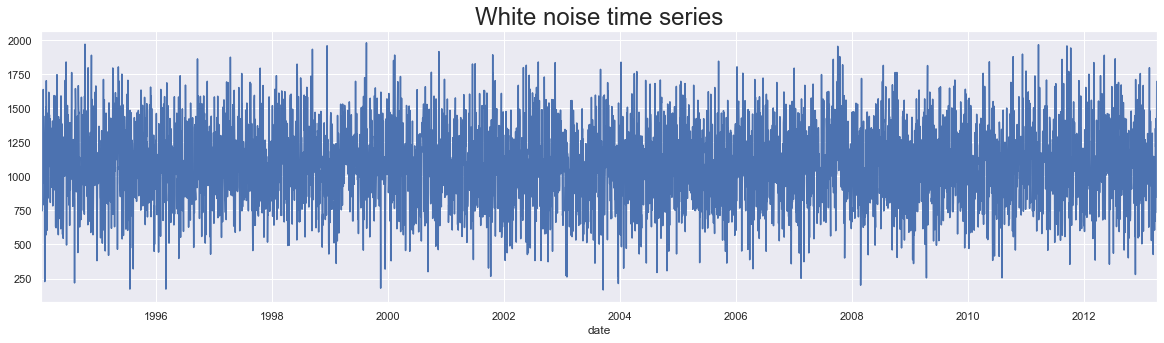

In [47]:
# we should use plot method to see how white noise should looks like.....
df.wn.plot(figsize = (20,5))
plt.title('White noise time series', size = 24)
plt.show()

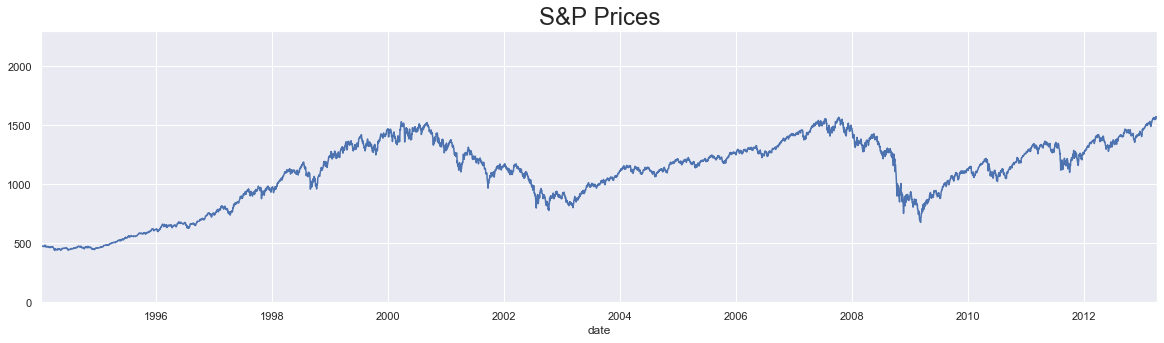

In [48]:
df.Market_value.plot(figsize = (20,5))
plt.title('S&P Prices', size = 24)
plt.ylim(0,2300)
plt.show()
# It is very easy to compare two graphs if both magnitudes are the same. let's make above graph magnitude from 0 to 2300 like white noise graph 

##### You may noticed that there is a smaller jumps between periods for S & P values. Since the prices are not random, we need to recognize the patterns for accurate forecast.

#### Random Walk: 

##### A special type of time-series, where values tend to persist over time and the differences between periods are simply white noise.
##### Pt = prices , Et = residuals (epsilon) , Pt = Pt-1 + Et , Et ~ wn (white noise)(meu (mean), sigma2(standard variance)).
##### We assures residuals(Et) as white noise, so they are arbitrary and cannot be predicted. This suggest that the best estimated prices today are prices yesterday. As we mentioned in previous lecture, in time series data patterns observed in past, will persist in future.So, best estimators for tomorrow prices are today's prices.

In [49]:
rw = pd.read_csv(r'C:\Users\User\Desktop\025 RandWalk.csv')
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [50]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [51]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [52]:
df['rw'] = rw.price

<ipython-input-52-ef067d009833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [53]:
df.head()

,Market_value,wn,rw
date,,,
1994-01-07,469.90,1080.950132,1122.139662
1994-01-10,475.27,989.101990,1080.347860
1994-01-11,474.13,1408.846036,1082.095245
1994-01-12,474.17,1033.217066,1083.639265
1994-01-13,472.47,746.341080,1067.146255


In [ ]:
#del df['Market_value']

In [54]:
df.head()

,Market_value,wn,rw
date,,,
1994-01-07,469.90,1080.950132,1122.139662
1994-01-10,475.27,989.101990,1080.347860
1994-01-11,474.13,1408.846036,1082.095245
1994-01-12,474.17,1033.217066,1083.639265
1994-01-13,472.47,746.341080,1067.146255


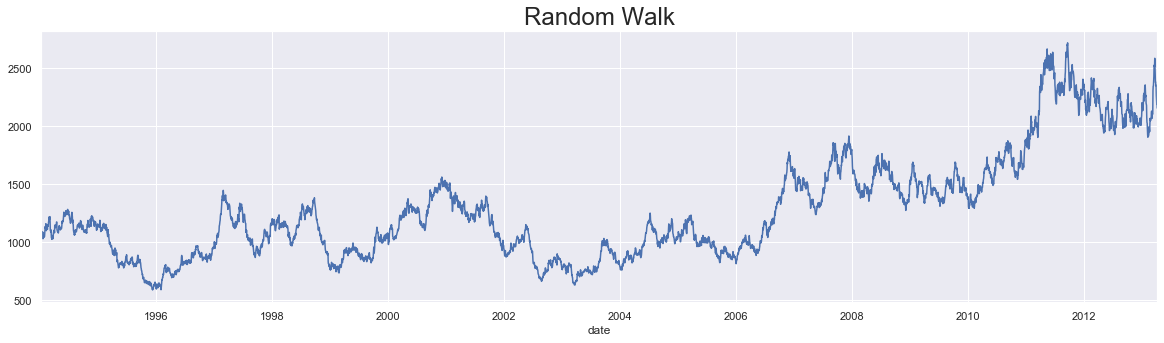

In [55]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

##### This graph is significantly different from the white noise one. in fcat random walk graph looks much more similar to the S&P values than the White noise graph.


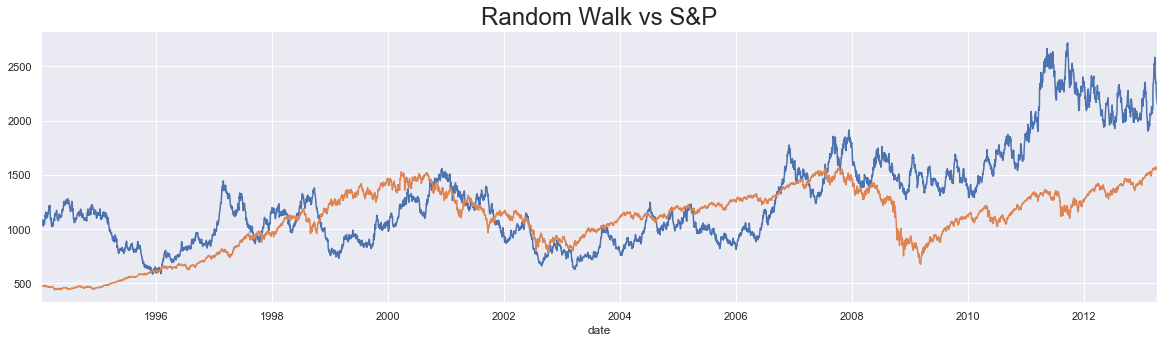

In [56]:

df.rw.plot(figsize = (20,5))
df.Market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

##### Both graphs looks similar, both have small variations between consecutive time periods. Both have cyclical increases and decreases in short periods of time.
##### In finance, There is a popular terms called Market Efficiency ....

#### Market efficiency : Measures the level of difficulty in forecasting correct future values 
###### In general, if a time series resembles a random walk then prices can't be predicted with great accuracy. Conversely, future prices can be predicted accuracy then there are "Arbitrage" opportunities.
##### Arbitrage : When investors manage to buy and sell commodities and make a safe profit, while the price adjusts.
##### Now, if this theory exists in market then investors take advantage which would lead to the price which is expected one. As a result, prices mostly adjusts accordingly, That's why we usually expect most markets gets more or less efficent.

##### Stationery: 
##### stationary in time series implies that taking consecutive samples of data with the same size , should have identical covariances regardless of the starting point. This characteristics of data is also known as "Weak - form" stationarity or "Covariance" stationarity.
##### Cov(S1) = Cov(S2)

#### Covariance stationarity assumptions: 

##### 1. Constant mean 2. Constant Variance 3. Consistent Covariance between periods at identical distance from one another Cov(Xn, Xn+k) = Cov(Xm, Xm+k)
##### For example : We want same covariance Cov(X1, X4) = Cov(X3,X6) since they are three interval apart.

##### For White Noise : 1. Mean is always zero 2. And variance always the constant 3. Additionally, Auto - Correlation between the lags is always zero. Since, Covariance Cov(Xn,Xn+k) = Correlation Corr(Xm, Xm+k) * multiplied by standard deviations_1 * standard deviations_2 = 0, Therefore white noise really satisfies all the assumptions of a covariance stationarity process.
##### Proper definition of stationarity is actually refers to the strict stationarity , where samples of identical size would have identical distributions.
##### Rarely observed in nature , hence stationarity = Covariance stationarity. 

##### To conduct proper Time - Series Analysis, We need to understand first that whether data is stationary or Non - stationary.
##### for this we will do dickey-Fuller Test or DF Test. H0 : Q < 1 ( one lag auto - correlation coefficient is lower than 1), H1: Q = 1
##### Test statistics < Critical Value => Stationarity 

#### Stationarity : 

In [57]:
df.dropna(axis=0, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [58]:
sts.adfuller(df.Market_value)

(-1.7369847452352463,
 0.4121645696770607,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

##### let's understand the values , meaning of values what they are and whta they are saying..
##### First value =-1.736460641147123 is test stattistcs. Hence, we mentioned as we can compare it with certain critical values. We have significant proof of stationarity, conveniently python also allows 1%,5% and 10% critical values from dickey-fuller table.
##### we may use any of them as levels of significant analysis. Further more T-Statistcs(Test Statistics) is greater than any of these three critical values, thus all of these levels significants we do not find any evidence of stationarity in the datatset.
##### Second value results the P - value with the T statistics. as p statistics is 0.41243147644381406, therefore there is a chance of 40% chance of null hypothesis (H0) is true that is 40% chance that data came from non stationary process.
##### The third value represents the number of lags used in the regression when determining the T statistics. In this case, we have 18 so there is some auto correlation going back 18 periods. will take it into the account for selecting the appropriate model.
##### Fourth value reprsents the number of observations used in the analysis. This value depends on the number of lags used in the regression, so two should usually add up to the size of the datatset.
##### Last line represents the maximized information criteria provided some apparent auto - correlation. lower the values , easier to make predictions for future. 

##### To revive some comparison what these results means, let's the run test for the white noise data we generated earlier ....

##### we know that the white noise is a stationary process , so we expect to a very low p value.additinally since there is no correlation in white noise there should be no lags in the regression.

In [59]:
sts.adfuller(df.wn)

(-48.548250909503395,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70720.59894340094)

##### We expect the exactly low p value and we get it that is values close to 0.0 (second value) and no lags are the part of regression that is third value 0

##### let's run the Augmented Dickey fuller test forn random walk data 

In [60]:
sts.adfuller(df.rw)

(-1.3286073927689712,
 0.6159849181617387,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

##### We get P value around 0.62, we don't have any significant evidence that this time series is stationary. with 0.62 P value there is 60 % chance that data comes from no stationary process.  

##### The covariance of two such intervals with identical size would very rarely be equal.Thus unlike white noise, we expect Random walks to be a non - stationary process.

#### Seasonality : 

##### Seasonality represents that certain trends will appear on a cyclical basis.

##### Decomposition: Split into 3 effects : 1. Trend -> Pattern Consistent throughout the data 2. Seasonal -> Express all seasonal effects due to seasonality 3. Residual -> Error of prediction or difference between actual data and the model we fit
##### Naive Decomposition : In naive decomposition, we expect the linear relationship between these three parts that is Trend, Seasonal, Residual and observe Time Series. Let's pay attention on the two approaches of the naive decomposition 1. Additive 2. Multiplicative 
##### For Additive, observed = trend + seasonal + residual .  Multiplicative, observed = trend x seasonal x residual  

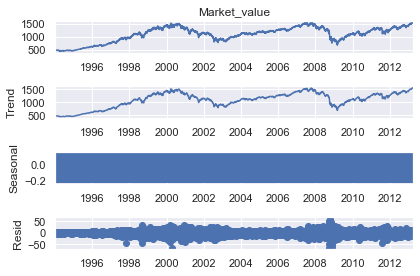

In [61]:
s_dec_additive = seasonal_decompose(df.Market_value, model = 'additive')
s_dec_additive.plot()
plt.show()

##### As you can see trend closely resembles the observed series that because the decomposition function uses the previous period values as a trend setter.
##### Trend part of the decompose explains the better variability of the data.
##### Seasonal parts looks like a rectangle, this happens when values are constantly oscillates back n forth and figure size is too small. In our case the linear change results constantly switching up and down between negative point 2 and positive ooint 1. Therefore , there is no concrete cyclical pattern determine by using naive decomposition.
##### The residuals are the errors of the model estimates. they are the difference between true values and predictions for any period. As you can see the residuals are greatly around the centuart 2000 and in 2008, this can be explain by the instability caused by the .com and housing prices bubbles respectively.
##### Overall additive naive decomposition reflects no seasonality. let's double check the result by multiplicative naive base decomposition.

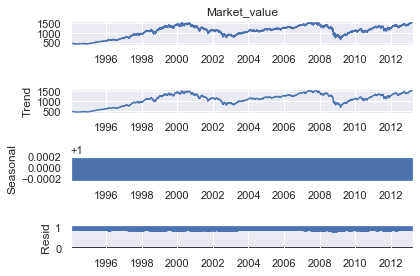

In [62]:
s_dec_multiplicative = seasonal_decompose(df.Market_value, model = 'multiplicative')
s_dec_multiplicative.plot()
plt.show()

##### we see very similar results to additive decompose , seasonal sequence has no clear patterns once again and Trend resembles to the observed series. Thus we have enough proof that there is no seasonality in S&P prices.
##### Since, the trend follows the actual patterns, so next we will see Correlation between past and present values.

#### Correlation between past and present values :

##### No shuffling , Preserve chronological order. 
##### Correlation: measures the similarity in the change of values of two series. here only single variable , so develop new mechanism for the same. 
##### Auto-Correlation : The correlation between a sequence and itself. More Precisely, it measures the level of resembles between sequence and several periods ago, such a series called lagged because it is delayed version of the original one.

#### ACF Method : 

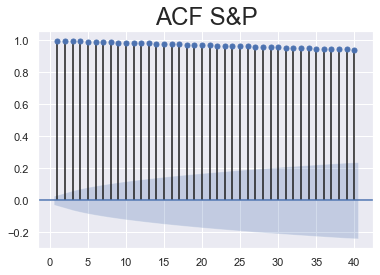

In [63]:
sgt.plot_acf(df.Market_value, lags = 40, zero = False) # lags 40 mean, last 40 periods before the current.
plt.title('ACF S&P', size = 24)
plt.show()

#### Let's examine the Garph : 

##### Value of the x axis represent the X-axis, you can notice this goes upto 40 as we mentioned there lag = 40. Value of Y-axis represents the number of auto - correlation. correlation can take value from +1 to -1 which is why graph stops at 1. but thin line represents the auto-correlation between time series and lagged copy of itself.
##### First line represents the auto-correlation of one time period ago, second line represents the coefficient value for two periods ago and so on..
##### The blue area around the x axis represents the significance. the value situated outside are significantly different from zero which suggest the auto correlation of specific lag.Take a second to observe how this area expands as lag value increases.
##### The greater the distance in time, the more unlikely it is that this auto correlation persists.
##### Notice that all lines are higher than the blue region, this suggest that coefficient are significant which is an indicator of time dependence on the data. moreover, we can see that the auto correlation barely diminishes(reduces) as lag increase. This in turn suggest the prices even month back can suggest decent estimators.

#### ACF of white Noise :

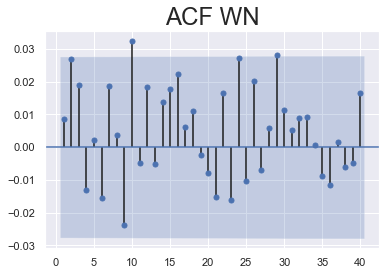

In [64]:
sgt.plot_acf(df.wn, lags = 40, zero = False) 
plt.title('ACF WN', size = 24)
plt.show()

##### Let's see the graph and compare with S&P , Here positive and negative auto correlation. but in ACP S&P all value are positives for auto correlation, also how all the lines falls under the blue area, thus the coefficients do not significant across the plot.
##### This suggest there is no auto correlation for any lag which is one of the assumptions for white noise data.


#### Check the ACF for a Random Walk : 

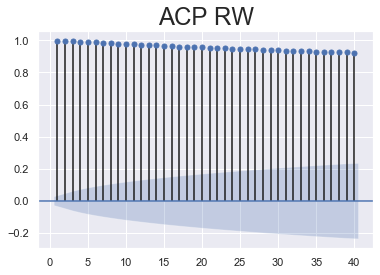

In [65]:
sgt.plot_acf(df.rw, lags = 40, zero = False) 
plt.title('ACP RW', size = 24)
plt.show()

##### The Partial Autocorrelation Function (PACF) : 

##### The autocorrelation measures the similarity between time series and it's lag version of itself.

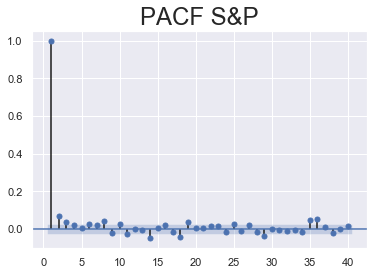

In [66]:
sgt.plot_pacf(df.Market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

##### It cancels out all additional channels a previous period value affects the present one.

##### PACF : Xt-2 -> Xt

##### PACF: Xt-2 -> Xt
##### Cancel out Xt-2 -> Xt-1 -> Xt
##### ACF: Xt-2 -> Xt, Xt-2 -> Xt-1 -> Xt 
##### Not significantly different from zero. Numeric values attached to them are not important. Being positive or negative is somewhat random without any lasting effects.

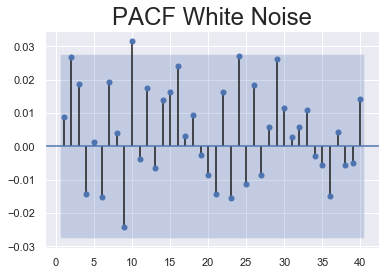

In [67]:
# By definition, there should not be any correlation between the elements between the white noise.
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF White Noise", size = 24)
plt.show()

##### Some of the coefficients ( that is dot) is beyond blue area & seems significant but that is very random.This relies our previous assumption that there is no autocorrelation in white noise.

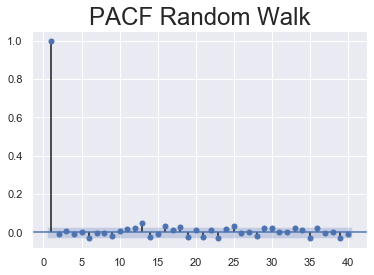

In [68]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Random Walk", size = 24)
plt.show()

#### Model Selection: 

##### Follow the simple model then expand it 
##### Xt = Co + Q1 Xt-1 + et 
##### Xt = Co + Q1 Xt-1 + Q2 Xt-2 +.......+ et
##### New model for more complex model need to be significantly different from zero. if that is not true then the estimators for these parameters are essentially Zero. Therefore, they don't help in predicting values,  no predictive powers. So, we must omit them and revert to the simple model.
##### !Not Significant -> Q = 0 -> No Predictive Power.
##### Parsimonious ( as simple as possible) -> Generally, Simpler model > Complex model 2. Significantly better predictions : Simpler model < complex model 
##### To determine that the predictions are significantly better, we introduce a statistics test called log - likelihood ratio test. This test is only applicable for different degrees of freedom when compared to similar models with same total number of lags -> No llr.
##### Information criteria : Lower the coefficients, less the data model required to make accurate predictions. The two most prominent criteria required are 1. AIC 2.BIC 
##### For simplicity, We opt for model with lower AIC or BIC coefficients. 
##### Residuals ~ Et ~ wn (mean, std variation)White noise. 

#### Autoregressive Model(AR):  

##### relies on past period values and past periods , only to predict current periods.
##### A linear model, where current period values are a sum of past outcomes multiplied by a numeric factor. 
##### Xt = C + QXt-1 + Et , Xt-1 =  The values of X during the previous period , Xt = Current eriod values, Q = Any numeric constant by which we multiply the lagged variable -1 < Q < 1 . if |Q| > 1, Q = 1.3, C = 0, T = 1000 , x2 = 1.3x1, x3 = (1.3)^2x1 , X1000 = (1.3)^999 x1 the values keep on increasing . Et = Residual - The difference between our prediction for period "t" and the correct value.

##### How many lags we need to include in our analysis ??

##### For example: if we do weather analysis for tomorrow then we will take last seven days into our account for analysis. a model with two lafs AR(2) will look like : Xt = C + Q1Xt-1 + Q2Xt-2 + Et .
###### More lags -> More complicated -> More coefficients -> More Likely is NOT significant
##### In general: More Data -> Better Prediction, However if the coefficients are not significantly differ from zero, they would have no effect on the predicted values. So it makes little sense to include them.
##### To determine the correct number of lags in our model, we should incorporate Auto-correlation and Partial auto-correlation functions. 

#### Examining the ACF and PACF of prices and their respect ACF/PACF graphs : 

# To determine the appropriate number of lags we need to incorporate AR model. Since we already calculated ACF and PACF of S&P value, when we need to introduce these functions. we better work with FTSE value ..... 

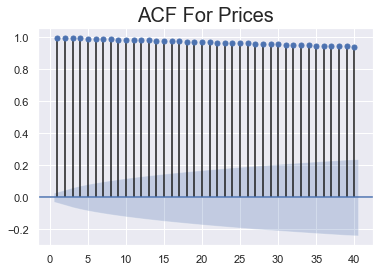

In [69]:
sgt.plot_acf(df.Market_value, zero = False, lags = 40)
plt.title("ACF For Prices", size = 20)
plt.show()

##### The effects barely deteriorate over time. the two time-series are similar in the way they behave and the way past values affect present ones. 
##### The more lags we include , the better our model will fit the data set we feed it. Coefficients might predict the data set 'too' well, makes the model prone to mistakes when trying to forcast future values. 


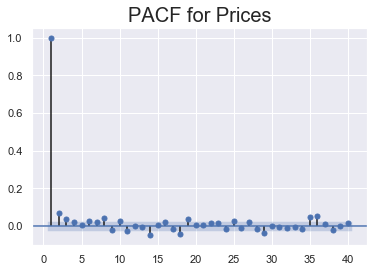

In [70]:
sgt.plot_pacf(df.Market_value, lags = 40, alpha = 0.05, zero = False, method = ("ols"))
plt.title("PACF for Prices", size = 20)
plt.show()

##### Coefficients of different size (not all between 0.9 and 1). negative coefficents are not significant. Coefficents from 25th are mostly negative , are not significant. Since, Coefficient values will be extremely close to 0 , their impact on the model is minimal, so they are not relevant to us. thus our models must include less than 25 lags. 
##### Another observation is that values after 22nd lag are negative. Let's know the reasonalble reasons behind it : Business days, Roughly 22 business days in a month. Cyclical changes every month. The values a month ago, negativels affect the values today. we won't be able to always spot such a convenient pattern in our data.


#### Fitting an AR(1) Model for prices: 

In [71]:
# What data we are using , what specific type of Autoregressive model we are testing on (order).
# The time series we want to model: -> FTSE -> "Market_value" column in the data frame.
from statsmodels.tsa.arima_model import ARMA 
model_ar = ARMA(df.Market_value, order = (1, 0)) # The number of past values we wish to incorporate into the model(second parameter). the zero means we are not taking any of the residual values into consideration.
# order = (1,0) is simply called AR(1) model .
results_ar = model_ar.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [72]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.390
Method:                       css-mle   S.D. of innovations             13.238
Date:                Mon, 10 Jan 2022   AIC                          40200.780
Time:                        08:47:38   BIC                          40220.344
Sample:                    01-07-1994   HQIC                         40207.636
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1045.9554    231.481      4.519      0.000     592.260    1499.650
ar.L1.Market_value     0.9994      0.001   1905.698      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

##### Xt = C + Q1Xt-1 + E , Const Value C = 1091.6133 , Q1 = 0.9992, This suggest , this is the coefficent of autoregressive value 1 lag ago for the associative time series.
##### The numeric values associated with "C" and phi 1 from the AR model we defined earlier in the section. Next column refelects the standard errors : How far away, on average the model's prediction are from the true values. Next is Z column which shows the associated test - statistics for significance.
##### The last two columns represent the critical values for the 95% interval , if 0(zero) is not a part of it, we can confirm the coefficients are significant.
##### We notice that Q is 0.9992 which is almost equal to 1, that's something the information we got from ACF S&P and PACF S&P grpahs. As we can see that value of both coefficent (z value) is significantly different from zero(p value), we can try for more complex model for greater accuracy.

#### AR models with several lags: 

# fitting a Higher -Lag AR Model in Time Series 
#### Higher lag AR Models (Upto periods two)

In [73]:
model_ar_2 = ARMA(df.Market_value, order = (2, 0)) # lag value 2, upto periods two 
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.280
Method:                       css-mle   S.D. of innovations             13.206
Date:                Mon, 10 Jan 2022   AIC                          40178.560
Time:                        08:47:48   BIC                          40204.645
Sample:                    01-07-1994   HQIC                         40187.700
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1062.3023    248.036      4.283      0.000     576.161    1548.444
ar.L1.Market_value     0.9300      0.014     68.000      0.000       0.903       0.957
ar.L2.Market_value     0.0694      0.014      5.071      0.000       0.043       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.4047           +0.0000j           14.4047            0.5000
-----------------------------------------------------------------------------
"""

##### Pt-2 (Prices two days ago) -> Pt-1(yesterday's prices) -> Pt(today's prices) 

##### if the p value is 0.225 then we can reject the null hypothesis. this suggest coefficient for the second lag is significantly different from zero, this means price two days severely does not effect today. This means that day before yesterday is only has effect on today's price and adding additional lag doesn't affect the prediction accuracy .
##### So, before reaching to the final conclusion we should check the AR(3) and AR(4) coefficients..usually more lags we include, thebetter our predictions become. However we run the risk of over-fitting
##### Compute thesummarized tables for AR(3) and AR(4) 2. The log-likelihood test, which will tell us if the more complex model will worth it or not.

#### AR(3) Model:

In [74]:
model_ar_3 = ARMA(df.Market_value, order = (3, 0)) # lag value 3, upto periods two 
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Mon, 10 Jan 2022   AIC                          40174.694
Time:                        08:47:57   BIC                          40207.301
Sample:                    01-07-1994   HQIC                         40186.120
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1058.6467    258.797      4.091      0.000     551.413    1565.880
ar.L1.Market_value     0.9277      0.014     68.249      0.000       0.901       0.954
ar.L2.Market_value     0.0376      0.019      1.989      0.047       0.001       0.075
ar.L3.Market_value     0.0342      0.014      2.423      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0507           -5.3051j            5.4081           -0.2811
AR.3           -1.0507           +5.3051j            5.4081            0.2811
-----------------------------------------------------------------------------
"""

In [75]:
model_ar_4 = ARMA(df.Market_value, order = (4, 0)) # lag value 4, upto periods two 
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Mon, 10 Jan 2022   AIC                          40174.511
Time:                        08:48:06   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1058.4951    265.341      3.989      0.000     538.437    1578.553
ar.L1.Market_value     0.9270      0.014     68.579      0.000       0.900       0.953
ar.L2.Market_value     0.0368      0.019      1.953      0.051      -0.000       0.074
ar.L3.Market_value     0.0148      0.019      0.771      0.441      -0.023       0.053
ar.L4.Market_value     0.0209      0.014      1.478      0.140      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9301           -0.0000j            3.9301           -0.5000
AR.3            1.1091           -3.3117j            3.4924           -0.1986
AR.4            1.1091           +3.3117j            3.4924            0.1986
-----------------------------------------------------------------------------
"""

##### log likelihood has increased.
##### As a general rule, we prefer models with Higher log-likelihood but lower information criteria. Since, this happens to be the case we have to perform log likelihood test or LLR test to determine two models are significantly different. 
##### For convienience, we define the log likelihood function so that we can use it in future too.

#### LLR Test : 

In [76]:
# This fucntion will take three parameters, that is mod_1, mod_2 and df. mod_1, mood_2 are for comparing the models and df is degrees of freedom, we use single departments for comparing the model. so we will use DF as a default value equal to 1.
# Further we will store the log likelihood values into the variables and will use llf for each model.
# Then we will test the Test-Statistics and store it into the variable LR 
from scipy.stats import chi2
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF) # chi squared method , p value will store upto three decimal using round method.
    return p

# Comparing Higher-Lag AR Models: 

In [77]:
LLR_test(model_ar, model_ar_3)

4.1333281950381446e-08

##### After calling the LLR test, we see the difference that log likelihood is significant. this suggest we should opt for more complicated model.

In [78]:
LLR_test(model_ar_3, model_ar_4)

0.13955609450388237

##### Fitting a more complicated model and checking if it gives us didtinguishably greater Log-Likelihoods.

##### Last lag not be significantly different from 0.

In [79]:
model_ar_4 = ARMA(df.Market_value, order = [4,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print('LLR test:' + str(LLR_test(model_ar_3, model_ar_4)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Mon, 10 Jan 2022   AIC                          40174.511
Time:                        08:48:34   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1058.4951    265.341      3.989      0.000     538.437    1578.553
ar.L1.Market_value     0.9270      0.014     68.579      0.000       0.900       0.953
ar.L2.Market_value  

In [80]:
model_ar_5 = ARMA(df.Market_value, order = [5,0])
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print('LLR test:' + str(LLR_test(model_ar_4, model_ar_5)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -20081.157
Method:                       css-mle   S.D. of innovations             13.195
Date:                Mon, 10 Jan 2022   AIC                          40176.314
Time:                        08:48:45   BIC                          40221.964
Sample:                    01-07-1994   HQIC                         40192.310
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1059.2694    266.683      3.972      0.000     536.581    1581.958
ar.L1.Market_value     0.9268      0.013     68.659      0.000       0.900       0.953
ar.L2.Market_value  

In [81]:
model_ar_6 = ARMA(df.Market_value, order = [6,0])
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print('LLR test:' + str(LLR_test(model_ar_5, model_ar_6)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -20079.653
Method:                       css-mle   S.D. of innovations             13.191
Date:                Mon, 10 Jan 2022   AIC                          40175.306
Time:                        08:48:55   BIC                          40227.477
Sample:                    01-07-1994   HQIC                         40193.587
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1057.7703    275.033      3.846      0.000     518.716    1596.825
ar.L1.Market_value     0.9267      0.013     69.284      0.000       0.900       0.953
ar.L2.Market_value  

In [82]:
model_ar_7 = ARMA(df.Market_value, order = [7,0])
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print('LLR test:' + str(LLR_test(model_ar_6, model_ar_7)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -20078.386
Method:                       css-mle   S.D. of innovations             13.187
Date:                Mon, 10 Jan 2022   AIC                          40174.773
Time:                        08:49:29   BIC                          40233.465
Sample:                    01-07-1994   HQIC                         40195.339
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1049.2192    283.388      3.702      0.000     493.790    1604.649
ar.L1.Market_value     0.9261      0.013     69.911      0.000       0.900       0.952
ar.L2.Market_value  

In [83]:
model_ar_8 = ARMA(df.Market_value, order = [8,0])
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print('LLR test:' + str(LLR_test(model_ar_7, model_ar_8)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnin

                              ARMA Model Results                              
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -20074.661
Method:                       css-mle   S.D. of innovations             13.177
Date:                Mon, 10 Jan 2022   AIC                          40169.321
Time:                        08:50:00   BIC                          40234.535
Sample:                    01-07-1994   HQIC                         40192.173
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1344.2013        nan        nan        nan         nan         nan
ar.L1.Market_value     0.9252      0.009    102.826      0.000       0.908       0.943
ar.L2.Market_value  

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


##### The p value = 0.05 is a significant value , above this value we should not consider the period as the lag is not that significant or effective for the predictors.
##### The pvalue for the 7th lag is 0.111, that is greater than 0.05 and LLR Test 0.115 , both of these indicates that including prices of 8th periods ago does not improve our model in any notable way, that's why we stopped at 7th lag even though it contains non significant value. Since, simple AR model served as a good predictors, so we will do LLR test again to make sure that adding 6th lag is worth it.
##### make sure to put simpler model first, also put the degrees of freedom to 6 that is DF = 6.

In [84]:
print('LLR Test:' + str(LLR_test(model_ar, model_ar_7, DF = 6)))

LLR Test:1.1197457593304052e-06


###### Not surprisingly, the complex model yields greater log likelihood. we decide to stick with it.
###### AR(1) model predicts better than AR(2) model but higher lag model better perform it even with several non-significant coefficients AR(3)|AR(4)|...|AR(7) > AR(1), in general AR(N+1) > AR(N) that is more lags we include, better the prediction. This is often the case when using AR model for predicting the non stationary data. To avoid such issues, we should use stationary time series.

#### AR Models: 

##### When we introduce AR models, we purposely omited the state they model the stationary process the best. Hence, when the data comes from the non stationary process, AR family models will perform poorly in finding the true relationship between the data. Earlier we saw S&P prices resembles a random walk but we never tested whether FTSE done very well or not. we can do it by doing augmented dickey-fuller test.

In [85]:
sts.adfuller(df.Market_value)

(-1.7369847452352463,
 0.4121645696770607,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

##### Here, P-value is equal to 0.4121 so we can't conclude that the data comes from stationary component. That's why we asume it is extraced from non stationary process. This suggest that we should not rely on AR models to make accurate forecasts. But what we can do in such cases ???
##### The best thing is that Transforming the data set, so that it fits the "Stationary" assumptions. In finance, common approach is to use returns instead of prices when measuring financial indices . For anybody unfamiliar with the term, Returns -> express the % change between the values for two consecutive periods.
##### the positive returns r > 0 (positive returns) meanse increasein price and neagative ones showcase a decline in prices. Thus, if investor forecast the positive returns , they prefer the keeping the stocks as the price goes up. conversely, if the prediction shows the negarive returns then stocks depreciate and they would prefer to get rid of it, although it is still valuable.
##### let's see how we can create the returns out of prices...

##### we need to take value of period Pt - Pt-1(period t-1 in it ) / Pt-1 * 100 to get percentage values. pandas provide the method called pct_change. as the name suggest it represent the present change in current in current and prior element Distance in time between the periods we want to compare, the default value is 1. pandas returns the %s expressed as real numbers like 0.02 -> 2%. To turn it into pure percentage value multiply it with 100. we do so by applying .mul(x) method.

##### Using Returns : 

In [86]:
df['returns'] =df.Market_value.pct_change(1).mul(100)

<ipython-input-86-6719c716a06e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] =df.Market_value.pct_change(1).mul(100)


In [87]:
df = df.iloc[1:] # Note they will have one return value fewer than the prices that's because we don't have any return value from the first period. we can't have increase or decrease from previous value. Having missing values means having no way to define auto-correlaion between the first and any other period and this will cause the failure oa auto correlation. To avoid such issues, we should remove first period prices. we can do it by iloc method 

In [88]:
sts.adfuller(df.returns)

(-17.034457190981193,
 8.280537020316944e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345134)

##### The Test Statistics falls far of the left even the 1% of the critical value which we see above too. Thus we can confidentlly say that data comes from a stationary process. This is exactly we are aiming for switching prices to returns.
##### ACF and PACF of returns.

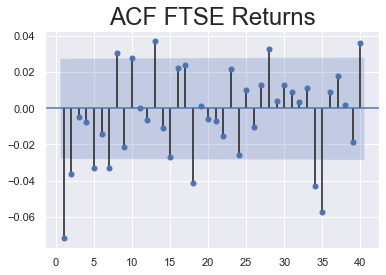

In [89]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("ACF FTSE Returns", size = 24)
plt.show()

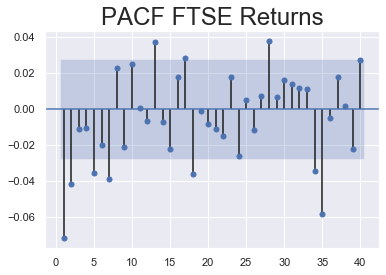

In [90]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title('PACF FTSE Returns', size = 24)
plt.show()

##### The plot greatly differs from what we saw with prices. Not all coefficents are positive and significant, additionally values greatly vary magnitudelly whereas in prices all close around the 1. First several lags are very imaportant, since they are significant but their coefficient are negative. Consecutive values move in different directions.
##### This suggest that the returns over the entire week are relevant to those of the current one. Since the relationship is negative, we can intrepret of this some form of natural adjustment occuring in the market. before we make fine decision, let's just see the partial auto correlation.
##### okay, results seems similar to the those we got it for ACF. one way to intrepet this is that prices today is often move in the opposite direction of prices yesterday, hence we tend to get prices increases following by prices decreases which falls in line without cyclical changes. The majority of effects they have on current values should already be accouunted for during the recurssive nature of Auto regressive model.
#### AR(1) for returns : 

In [91]:
model_ret_ar_1 = ARMA(df.returns, order = (1,0))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [92]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [93]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -8067.541
Method:                       css-mle   S.D. of innovations              1.207
Date:                Mon, 10 Jan 2022   AIC                          16141.081
Time:                        08:51:09   BIC                          16160.645
Sample:                    01-10-1994   HQIC                         16147.937
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.016      1.959      0.050   -1.03e-05       0.062
ar.L1.returns    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

##### just see the p value of both the coefficients that 0.05 and 0.000 ,  This means that neither is significantly different from 0. So, this model holds no real predictive power. The more easily yesterday's price is affected by higher lags..the more inaccurate its coefficients becomes. This is because of the compunding effects of the lags..
##### Ofcourse, this decreases the predictive power of the model. Therefore , we should check for higher lags models for returns....

#### Higher Lag AR models for Returns 

##### We going to check whether the complicated complex models with higher lags will perform bettwer or not ...!!

In [94]:
model_ret_ar_2 = ARMA(df.Market_value, order = (2, 0)) # lag value 2
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -20081.689
Method:                       css-mle   S.D. of innovations             13.207
Date:                Mon, 10 Jan 2022   AIC                          40171.379
Time:                        08:51:18   BIC                          40197.464
Sample:                    01-10-1994   HQIC                         40180.519
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1054.6406    247.768      4.257      0.000     569.025    1540.257
ar.L1.Market_value     0.9301      0.014     67.953      0.000       0.903       0.957
ar.L2.Market_value     0.0694      0.014      5.067      0.000       0.043       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.4061           +0.0000j           14.4061            0.5000
-----------------------------------------------------------------------------
"""

##### the p value is zero which means Q2 is significantly different from 0 and should be inluded in the model. Also, coefficent Q1 has decreased further may if we add more lags, it will actually become significant. since the p value of new coefficient Q2 is zero , we suspect that the change in Log-Likelihood is also significant.
##### we will run LLR test for AR model 1 and 2 . make sure that put simpler model first and complicated model second while caling the LLR test function.

In [95]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

1.0

##### High values of the statistic mean that the observed outcome was nearly as likely to occur under the null hypothesis as the alternative  and  so the null hypothesis cannot be rejected. 
##### All the information criterion are lower then they were for the AR(1) model.

In [96]:
model_ret_ar_3 = ARMA(df.Market_value, order = (3, 0)) # lag value 2, upto periods two 
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood              -20078.758
Method:                       css-mle   S.D. of innovations             13.199
Date:                Mon, 10 Jan 2022   AIC                          40167.517
Time:                        08:51:39   BIC                          40200.123
Sample:                    01-10-1994   HQIC                         40178.942
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1064.3418    256.774      4.145      0.000     561.073    1567.610
ar.L1.Market_value     0.9277      0.014     68.159      0.000       0.901       0.954
ar.L2.Market_value     0.0376      0.019      1.987      0.047       0.001       0.075
ar.L3.Market_value     0.0342      0.014      2.422      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0506           -5.3053j            5.4084           -0.2811
AR.3           -1.0506           +5.3053j            5.4084            0.2811
-----------------------------------------------------------------------------
"""

##### Since thep value of two coefficients are zero, we expect the LLR test to suggest that this model is better tahn the previous one.


In [97]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.015470079389539926

##### As expected, almost zero so the two log likelihood are distinguishly different. and what we see next, that our information criteria is lower, so we can assume our models can out performs with the counterpart. we must repeat the same process untill the additional coefficient is insignificant. THE llr TEST FAILS & we get higher AIC or BIC values.

In [98]:
model_ret_ar_3 = ARMA(df.Market_value, order = (3, 0)) # lag value 3
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood              -20078.758
Method:                       css-mle   S.D. of innovations             13.199
Date:                Mon, 10 Jan 2022   AIC                          40167.517
Time:                        08:51:55   BIC                          40200.123
Sample:                    01-10-1994   HQIC                         40178.942
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1064.3418    256.774      4.145      0.000     561.073    1567.610
ar.L1.Market_value     0.9277      0.014     68.159      0.000       0.901       0.954
ar.L2.Market_value     0.0376      0.019      1.987      0.047       0.001       0.075
ar.L3.Market_value     0.0342      0.014      2.422      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0506           -5.3053j            5.4084           -0.2811
AR.3           -1.0506           +5.3053j            5.4084            0.2811
-----------------------------------------------------------------------------
"""

In [99]:
model_ret_ar_4 = ARMA(df.Market_value, order = (4, 0)) # lag value 4
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood              -20077.668
Method:                       css-mle   S.D. of innovations             13.196
Date:                Mon, 10 Jan 2022   AIC                          40167.337
Time:                        08:52:04   BIC                          40206.464
Sample:                    01-10-1994   HQIC                         40181.048
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1050.5959    264.892      3.966      0.000     531.416    1569.776
ar.L1.Market_value     0.9270      0.014     68.498      0.000       0.900       0.953
ar.L2.Market_value     0.0368      0.019      1.951      0.051      -0.000       0.074
ar.L3.Market_value     0.0148      0.019      0.772      0.440      -0.023       0.053
ar.L4.Market_value     0.0208      0.014      1.476      0.140      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9311           -0.0000j            3.9311           -0.5000
AR.3            1.1091           -3.3123j            3.4930           -0.1986
AR.4            1.1091           +3.3123j            3.4930            0.1986
-----------------------------------------------------------------------------
"""

In [100]:
model_ret_ar_5 = ARMA(df.Market_value, order = (5, 0)) # lag value 5
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood              -20077.569
Method:                       css-mle   S.D. of innovations             13.196
Date:                Mon, 10 Jan 2022   AIC                          40169.139
Time:                        08:52:14   BIC                          40214.787
Sample:                    01-10-1994   HQIC                         40185.135
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1060.8774    265.382      3.998      0.000     540.738    1581.017
ar.L1.Market_value     0.9268      0.014     68.579      0.000       0.900       0.953
ar.L2.Market_value     0.0367      0.019      1.947      0.052      -0.000       0.074
ar.L3.Market_value     0.0146      0.019      0.760      0.448      -0.023       0.052
ar.L4.Market_value     0.0150      0.019      0.780      0.435      -0.023       0.053
ar.L5.Market_value     0.0063      0.014      0.445      0.656      -0.021       0.034
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2            1.5646           -2.6875j            3.1098           -0.1661
AR.3            1.5646           +2.6875j            3.1098            0.1661
AR.4           -3.2601           -2.4133j            4.0561           -0.3986
AR.5           -3.2601           +2.4133j            4.0561            0.3986
-----------------------------------------------------------------------------
"""

In [101]:
model_ret_ar_6 = ARMA(df.Market_value, order = (6, 0)) # lag value 6 
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood              -20076.067
Method:                       css-mle   S.D. of innovations             13.192
Date:                Mon, 10 Jan 2022   AIC                          40168.134
Time:                        08:52:22   BIC                          40220.304
Sample:                    01-10-1994   HQIC                         40186.415
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1049.6853    274.618      3.822      0.000     511.444    1587.927
ar.L1.Market_value     0.9267      0.013     69.190      0.000       0.900       0.953
ar.L2.Market_value     0.0364      0.019      1.936      0.053      -0.000       0.073
ar.L3.Market_value     0.0143      0.019      0.741      0.459      -0.023       0.052
ar.L4.Market_value     0.0141      0.019      0.734      0.463      -0.024       0.052
ar.L5.Market_value    -0.0164      0.019     -0.852      0.394      -0.054       0.021
ar.L6.Market_value     0.0245      0.014      1.734      0.083      -0.003       0.052
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           -0.0000j            1.0004           -0.0000
AR.2            1.5639           -1.3901j            2.0924           -0.1156
AR.3            1.5639           +1.3901j            2.0924            0.1156
AR.4           -2.0822           -0.0000j            2.0822           -0.5000
AR.5           -0.6882           -2.0021j            2.1171           -0.3027
AR.6           -0.6882           +2.0021j            2.1171            0.3027
-----------------------------------------------------------------------------
"""

In [102]:
model_ret_ar_7 = ARMA(df.Market_value, order = (7, 0)) # lag value 7 
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -20074.801
Method:                       css-mle   S.D. of innovations             13.189
Date:                Mon, 10 Jan 2022   AIC                          40167.601
Time:                        08:52:34   BIC                          40226.292
Sample:                    01-10-1994   HQIC                         40188.167
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1053.2888    281.094      3.747      0.000     502.355    1604.223
ar.L1.Market_value     0.9261      0.013     69.752      0.000       0.900       0.952
ar.L2.Market_value     0.0367      0.019      1.963      0.050    5.93e-05       0.073
ar.L3.Market_value     0.0139      0.019      0.724      0.469      -0.024       0.052
ar.L4.Market_value     0.0138      0.019      0.718      0.473      -0.024       0.052
ar.L5.Market_value    -0.0172      0.019     -0.893      0.372      -0.055       0.021
ar.L6.Market_value     0.0037      0.019      0.190      0.849      -0.034       0.041
ar.L7.Market_value     0.0225      0.014      1.592      0.111      -0.005       0.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           -0.0000j            1.0004           -0.0000
AR.2            1.4420           -1.0292j            1.7717           -0.0987
AR.3            1.4420           +1.0292j            1.7717            0.0987
AR.4           -0.1854           -1.8366j            1.8460           -0.2660
AR.5           -0.1854           +1.8366j            1.8460            0.2660
AR.6           -1.8382           -0.8844j            2.0399           -0.4286
AR.7           -1.8382           +0.8844j            2.0399            0.4286
-----------------------------------------------------------------------------
"""

In [103]:
print(LLR_test(model_ret_ar_6, model_ret_ar_7))

0.11150248751963857


#### Since, it fails on every expect with the previous one we opt for AR(6)

#### Normalizing a data set: 

##### Normalizing the prices and returns: 

##### When using AR model, we prefer on Returns rather than Prices. This is because of the non stationary nature of the prices. In Time series, normalization means converting the values into its percentage value. Resulting series easy to compare with other time series. In general, through normalization we can see how two performs relatively to each other. This gives us better understanding which one to invest in and which one avoid...!!

##### 1.) Set some benchmark : Interpretation seems easiest if we simply go with the value for the first period.

In [104]:
benchmark = df.Market_value.iloc[0]

In [105]:
df['norm'] = df.Market_value.div(benchmark).mul(100)

<ipython-input-105-593cc67134e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm'] = df.Market_value.div(benchmark).mul(100)


In [106]:
sts.adfuller(df.norm)

(-1.7396871077371314,
 0.4107891338207856,
 18,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 24351.278699350325)

#### High p value suggest non stationary.

##### Thus normalizing prices does not result in  the stationary data.therefore, we are not able to use in AR models. However normalization data is a good practice for getting stationary data.  

#### Normalization Returns : 

##### they account for the obsolute profitability of the investment in contract to prices. 

##### They allow us to compare the relative profitability as opposed to non-normalized returns. 

In [107]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

<ipython-input-107-4c0e57a94e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_ret'] = df.returns.div(bench_ret).mul(100)


(-17.034457190981158,
 8.28053702031718e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 60636.5822032878)

##### The Test statistic -17.0344 is much smaller than 1% critical value that is -3.431. So, we can say with certainity that this data is stationary. 

##### Further more, we can conclude that normalizing does not affect stationarity. 

#### Analyzing Normalizing and Non normalizing Returns : 
##### This will give us why one is prefer over others .......... 
#### Model Selection for Normalized Returns : 

##### Fitting different lagged models for prices and non-normalized returns 

#### Normalized Returns : 

In [108]:
model_norm_ret_ar_1 = ARMA(df.norm_ret, order = (1, 0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -30515.434
Method:                       css-mle   S.D. of innovations            105.618
Date:                Mon, 10 Jan 2022   AIC                          61036.869
Time:                        08:53:21   BIC                          61056.432
Sample:                    01-10-1994   HQIC                         61043.724
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7248      1.391      1.959      0.050      -0.001       5.451
ar.L1.norm_ret    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

##### all values are identical to the non normalized values. we can assume that normalizing does not affect on model selection.To be on the safe side , let's take AR(2) Normalized models and compare the values with  non normalized values.  

In [109]:
model_norm_ret_ar_2 = ARMA(df.norm_ret, order = (2, 0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -30511.071
Method:                       css-mle   S.D. of innovations            105.527
Date:                Mon, 10 Jan 2022   AIC                          61030.142
Time:                        08:53:36   BIC                          61056.226
Sample:                    01-10-1994   HQIC                         61039.282
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7234      1.334      2.042      0.041       0.109       5.338
ar.L1.norm_ret    -0.0749      0.014     -5.312      0.000      -0.103      -0.047
ar.L2.norm_ret    -0.0417      0.014     -2.955      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8155j            4.8986           -0.2794
AR.2           -0.8987           +4.8155j            4.8986            0.2794
-----------------------------------------------------------------------------
"""

##### Exam same values except the coefficients values. So, we can assume that the same model that failed for regular returns would also fail for normalized returns. Let's check out AR(7) normalized value ...

In [110]:
model_norm_ret_ar_7 = ARMA(df.norm_ret, order = (7, 0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -30502.512
Method:                       css-mle   S.D. of innovations            105.347
Date:                Mon, 10 Jan 2022   AIC                          61023.023
Time:                        08:53:53   BIC                          61081.714
Sample:                    01-10-1994   HQIC                         61043.589
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7248      1.188      2.294      0.022       0.396       5.053
ar.L1.norm_ret    -0.0774      0.014     -5.485      0.000      -0.105      -0.050
ar.L2.norm_ret    -0.0451      0.014     -3.187      0.001      -0.073      -0.017
ar.L3.norm_ret    -0.0140      0.014     -0.992      0.321      -0.042       0.014
ar.L4.norm_ret    -0.0147      0.014     -1.038      0.299      -0.042       0.013
ar.L5.norm_ret    -0.0386      0.014     -2.730      0.006      -0.066      -0.011
ar.L6.norm_ret    -0.0232      0.014     -1.638      0.101      -0.051       0.005
ar.L7.norm_ret    -0.0389      0.014     -2.762      0.006      -0.067      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2978           -0.7660j            1.5070           -0.0849
AR.2            1.2978           +0.7660j            1.5070            0.0849
AR.3            0.2153           -1.6118j            1.6261           -0.2289
AR.4            0.2153           +1.6118j            1.6261            0.2289
AR.5           -1.5925           -0.0000j            1.5925           -0.5000
AR.6           -1.0143           -1.2874j            1.6389           -0.3562
AR.7           -1.0143           +1.2874j            1.6389            0.3562
-----------------------------------------------------------------------------
"""

##### we are seeing the exact same value, so we should go for AR(6) models .....

#### The errors Analysis : 

##### Examine a summary of their statistics, testing them for stationarity. 

#### Analysing the residuals : 

In [111]:
df['res_price'] = results_ar_7.resid

<ipython-input-111-0f110e8e009e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_price'] = results_ar_7.resid


In [112]:
df.res_price.mean()

0.2768199343403309

In [113]:
df.res_price.var()

173.82718886192254

##### since variance has higher value it means data is not concentrated around the mean , distribted all over...

##### this is because AR model performs poor in non stationarity data...

In [114]:
sts.adfuller(df.res_price)

(-16.21342182075257,
 3.9648702152989354e-29,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39896.89375553988)

##### P value almost equals to zero which suggest the stationarity ....

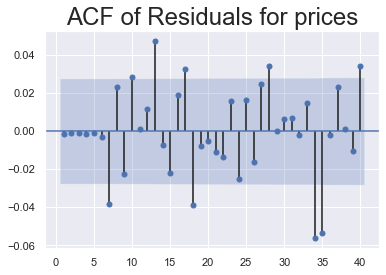

In [115]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF of Residuals for prices", size = 24)
plt.show()

##### After plotting the fucntion, we can see that the majority of the points fall in the blue region. As you know this suggest they are not significantly different from zero which fits the characteristics of the white noise. However, few points falls outside the blue region lead us to believe even better predictor. we must plot the residuals to see the resembles with white noise data. 
##### we do so by calling the plot method by calling the plot method ......

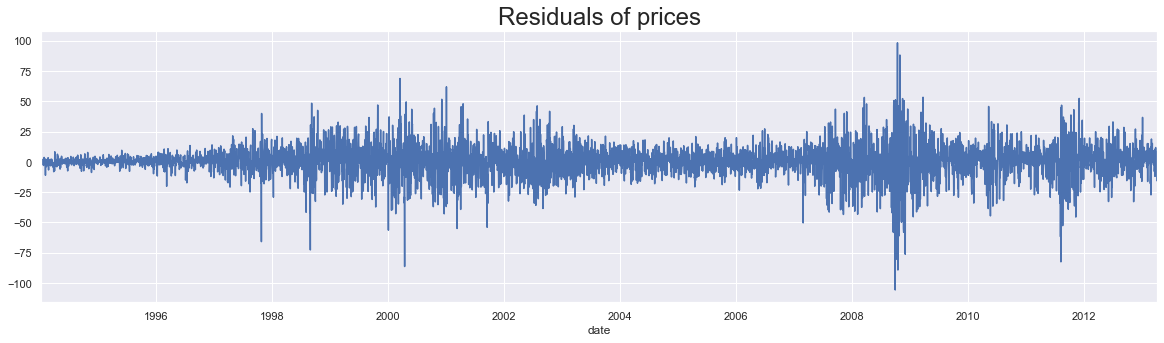

In [116]:
df.res_price[1:].plot(figsize = (20,5))
plt.title('Residuals of prices', size = 24)
plt.show()

##### Nothing like the original one we had for prices. we cannot find any obvious pattern for the data, so our choice for the model is correct. It's important to note since we use AR model on non stationary data so our model still far from the great.
#### Analysing the residuals: 

In [117]:
df['res_ret'] = results_ret_ar_6.resid

<ipython-input-117-5c37aa07524c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret'] = results_ret_ar_6.resid


In [118]:
df.res_ret.mean()

0.156267647633746

In [119]:
df.res_ret.var()

239.7021222372362

In [120]:
sts.adfuller(df.res_ret)

(-16.229930411807874,
 3.8208054316534046e-29,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39897.10199154049)

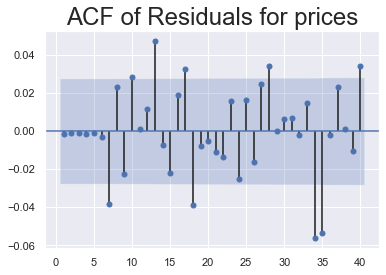

In [121]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF of Residuals for prices", size = 24)
plt.show()

##### similar situations not all lags are significant. 

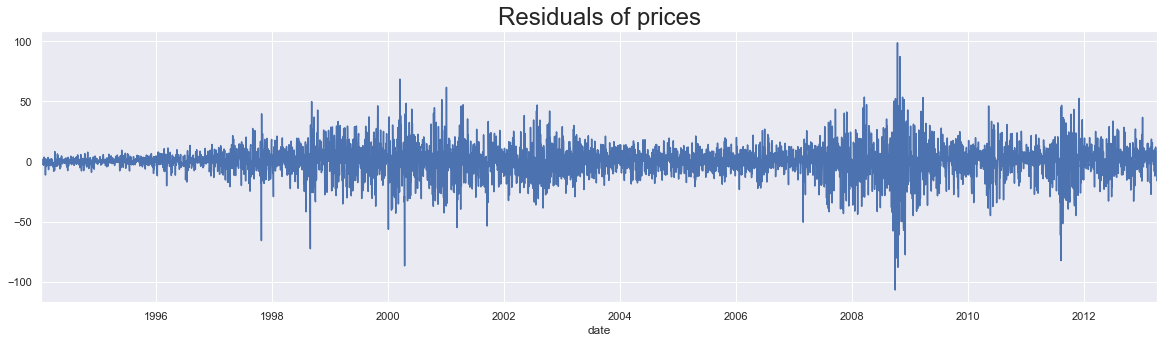

In [122]:
df.res_ret[1:].plot(figsize = (20,5))
plt.title('Residuals of prices', size = 24)
plt.show()

#### Accounting for unexpected Shocks : 

#### Unpredicted Events : 

##### Self correcting model: More errors examined -> More adapted model -> Such models are knowns as moving Average model(MA) -> because observing the shocks allows the mean allows to move accordingly.They do exceptionally predicting random walk data because they always adjust errors of the previous periods , this give the model prediction a better prediction route. It also stops the model from greatly diverging which incredible useful for not stationary data. 

#### Simple MA Model : 

##### rt = c + Q1Et-1 + Et 
##### rt = The values of 'r' in the current period 
##### Q1 = A numeric coefficient for the value associated with the 1st lag
##### Et = Residuals for the current period 
##### Et-1 = Residuals for the past period 
#### How to generate these residuals ??

##### We start from the begining of the dataset and try to predict each value : Actual r^t ---------> Predicted r^t , Actual r^t - Predicted r^t = Residual Et 
##### Therefore we generate these residuals as we go through the set and create the epsilon variable as we go through the time.
##### You can get similarity between MA and AR Model , MA(1) model is similar with AR(infinity) with certain restrictions. 
##### AR: Yt = C + Q1Yt-1 + Et , MA: Yt = C + Q1Et-1 +Et , only difference is that AR model rely on the varaiables whereas the MA model relies on the residuals.
##### There is one similarity more that absolute value of restrictions should be less than 1. To preventt compounded effects exploding in magnitude.
##### Key differences : AR : rely on PACF & MA: Rely on the ACF , the reason is MA model aren't based on past based returns. Therefore, Determining which lagged values have a significant direct effect in the present day ones is not relevant. 
##### Acf provides an idea of how many lags we should use .

#### ACF for Returns : 

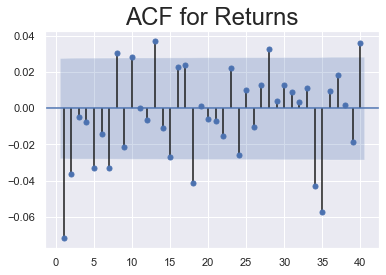

In [124]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40 )
plt.title("ACF for Returns", size = 24)
plt.show()

##### Those data points which are not in blue region are significant either positive or negative . positive directly proportional or negative inversely proportional, that is they have effects ....effective lags. with negative, minimal effect ....

#### MA(1) model : 

In [126]:
from statsmodels.tsa.arima_model import ARMA

#### Importing the data and pre-processing : 

In [129]:
raw_csv_data = pd.read_csv(r"C:\Users\User\Desktop\Index2018.csv")

In [130]:
df_comp = raw_csv_data.copy()

In [131]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [132]:
df_comp['market_value'] = df_comp.ftse

In [133]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [134]:
df_comp.head()

,market_value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


##### Losing data is a practice we should avoid whenever we can......

#### MA(1) for Returns : 

In [135]:
model_ret_ma_1 = ARMA(df.returns[1:], order = (0, 1)) # All the values of the return column after the first one. 
# Simultaneously : 1. Keep the entirity of our dataframe 2. Handling the no missing values requirement. 
# ARMA(order = (p, q)) , P -> AR components , q - MA components. since our model doesn't contain the AR components and contains only the MA components therefore we will use (0,1).
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 1)   Log Likelihood               -8064.904
Method:                       css-mle   S.D. of innovations              1.207
Date:                Mon, 10 Jan 2022   AIC                          16135.809
Time:                        09:58:09   BIC                          16155.372
Sample:                    01-11-1994   HQIC                         16142.664
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0309      0.016      1.970      0.049       0.000       0.062
ma.L1.returns    -0.0781      0.015     -5.334      0.000      -0.107      -0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           12.8063           +0.0000j           12.8063            0.0000
-----------------------------------------------------------------------------
"""

##### You can notice that the coefficent for the one lag ago residuals is significant at the 10% level but not at the 5% level. 


##### Fit a higher lag MA model , MA(2), Analyse its coefficients and log - likelihood , repeat  the same process for several times.

#### Higher - Lag MA models for Returns : 

In [139]:
model_ret_ma_2 = ARMA(df.returns[1:], order = (0, 2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 2)   Log Likelihood               -8061.245
Method:                       css-mle   S.D. of innovations              1.206
Date:                Mon, 10 Jan 2022   AIC                          16130.491
Time:                        10:29:53   BIC                          16156.575
Sample:                    01-11-1994   HQIC                         16139.631
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0309      0.015      2.053      0.040       0.001       0.060
ma.L1.returns    -0.0759      0.014     -5.380      0.000      -0.104      -0.048
ma.L2.returns    -0.0389      0.014     

##### We are observing that coefficent of error terms for two perioda ago is significant as less than p value. lag 1 is also significant ..  P-value of LLR test is also less than zero which makes lag 2 more good predictor than lag 1.

In [140]:
model_ret_ma_3 = ARMA(df.returns[1:], order = (0, 3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 3)   Log Likelihood               -8060.989
Method:                       css-mle   S.D. of innovations              1.206
Date:                Mon, 10 Jan 2022   AIC                          16131.977
Time:                        10:30:33   BIC                          16164.582
Sample:                    01-11-1994   HQIC                         16143.402
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0309      0.015      2.078      0.038       0.002       0.060
ma.L1.returns    -0.0758      0.014     -5.370      0.000      -0.103      -0.048
ma.L2.returns    -0.0389      0.014     

In [141]:
model_ret_ma_4 = ARMA(df.returns[1:], order = (0, 4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 4)   Log Likelihood               -8060.425
Method:                       css-mle   S.D. of innovations              1.206
Date:                Mon, 10 Jan 2022   AIC                          16132.850
Time:                        10:31:40   BIC                          16171.976
Sample:                    01-11-1994   HQIC                         16146.560
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0309      0.015      2.115      0.034       0.002       0.060
ma.L1.returns    -0.0768      0.014     -5.426      0.000      -0.104      -0.049
ma.L2.returns    -0.0388      0.014     

In [142]:
model_ret_ma_5 = ARMA(df.returns[1:], order = (0, 5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 5)   Log Likelihood               -8056.959
Method:                       css-mle   S.D. of innovations              1.205
Date:                Mon, 10 Jan 2022   AIC                          16127.918
Time:                        10:32:24   BIC                          16173.565
Sample:                    01-11-1994   HQIC                         16143.914
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0310      0.014      2.201      0.028       0.003       0.059
ma.L1.returns    -0.0774      0.014     -5.479      0.000      -0.105      -0.050
ma.L2.returns    -0.0404      0.014     

In [143]:
model_ret_ma_6 = ARMA(df.returns[1:], order = (0, 6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 6)   Log Likelihood               -8056.327
Method:                       css-mle   S.D. of innovations              1.205
Date:                Mon, 10 Jan 2022   AIC                          16128.654
Time:                        10:32:55   BIC                          16180.822
Sample:                    01-11-1994   HQIC                         16146.934
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0310      0.014      2.236      0.025       0.004       0.058
ma.L1.returns    -0.0777      0.014     -5.508      0.000      -0.105      -0.050
ma.L2.returns    -0.0391      0.014     

In [144]:
model_ret_ma_7 = ARMA(df.returns[1:], order = (0, 7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 7)   Log Likelihood               -8054.143
Method:                       css-mle   S.D. of innovations              1.204
Date:                Mon, 10 Jan 2022   AIC                          16126.286
Time:                        10:33:34   BIC                          16184.975
Sample:                    01-11-1994   HQIC                         16146.852
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0310      0.013      2.296      0.022       0.005       0.057
ma.L1.returns    -0.0754      0.014     -5.329      0.000      -0.103      -0.048
ma.L2.returns    -0.0394      0.014     

In [145]:
model_ret_ma_8 = ARMA(df.returns[1:], order = (0, 8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 8)   Log Likelihood               -8051.898
Method:                       css-mle   S.D. of innovations              1.204
Date:                Mon, 10 Jan 2022   AIC                          16123.796
Time:                        10:35:35   BIC                          16189.006
Sample:                    01-11-1994   HQIC                         16146.647
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0310      0.014      2.232      0.026       0.004       0.058
ma.L1.returns    -0.0753      0.014     -5.334      0.000      -0.103      -0.048
ma.L2.returns    -0.0416      0.014     

In [146]:
LLR_test(model_ret_ma_6, model_ret_ma_8, DF=2) # check for better predictor # We need to estimate the coeficents for 8 variables in the complicated model (MA(8))

0.011927154527957541

##### Since 0.011 is less than 0.05 therefore more complex model performs better even if it contains non significant coefficient.

##### Examine the residuals, till we have model selection through ACF and summary statistics.

##### Last time we found two moving avearge (MA) model which fits the data well. A simpler one with six lags and more complex one with eight lags. LLR test suggest that higher lag model is better estimator.
##### Start by extracting the MA(8) residuals. 

In [148]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

<ipython-input-148-822d532f7e26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]


In [153]:
print(round(df.res_ret_ma_8.mean(),3))

0.0


In [155]:
print(round(df.res_ret_ma_8.var(),3))

1.449


In [159]:
from math import sqrt
round(sqrt(df.res_ret_ma_8.var()), 3)

1.204

##### Gaussian White -Noise ---> Normality , so we can use 68, 95, 99,7 rule. this dictates what part of the data is spread within 1, 2 and 3 standard deviations away from the mean in either direction.


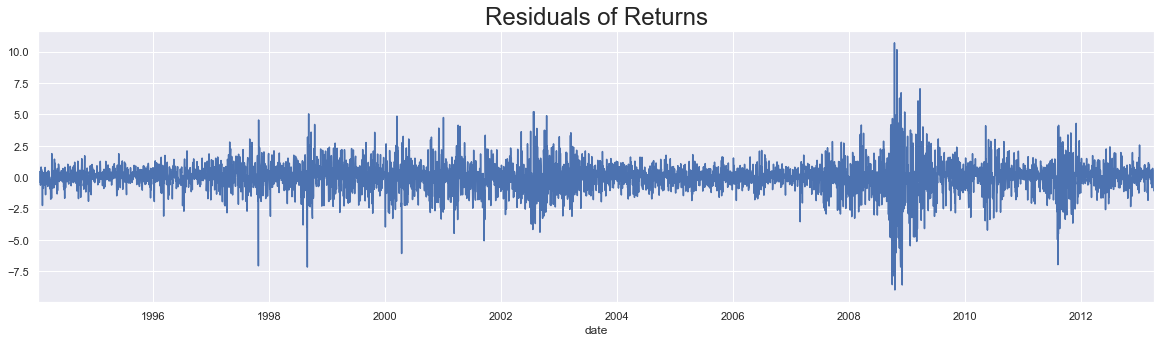

In [161]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [162]:
# if data is non stationary, it can't be consider white noise 
sts.adfuller(df.res_ret_ma_8[2:])

(-70.85244640582071,
 0.0,
 0,
 5017,
 {'1%': -3.431654095870046,
  '5%': -2.8621162697870046,
  '10%': -2.5670767490325597},
 16024.028129140246)

sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF of residuals for returns", size = 24)
plt.show()

##### Non of the 17 lags are significant . ofcourse first 8 of them are incorporated in the model,so they are essentially zero. 9 lags are alos insignificant.
##### since before 18th lags are insignificant , so 18th one will also not play a major role as estimator. Markets adjust to shocks, so values far in the past lose relevance.

#### Normalized returns : 

In [164]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

<ipython-input-164-4aa3c61386c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_ret'] = df.returns.div(bench_ret).mul(100)


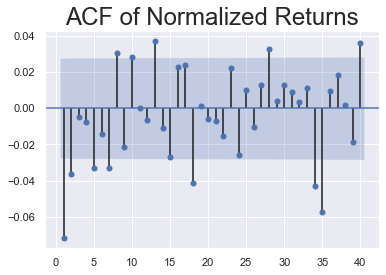

In [166]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns", size = 24)
plt.show()

##### MA(6) models still good ...

In [167]:
model_norm_ret_ma_8 = ARMA(df.norm_ret[1:], order = (0,8))
results_norm_ret_ma_8 = model_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(0, 8)   Log Likelihood               -8051.898
Method:                       css-mle   S.D. of innovations              1.204
Date:                Mon, 10 Jan 2022   AIC                          16123.796
Time:                        19:19:18   BIC                          16189.006
Sample:                    01-11-1994   HQIC                         16146.647
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0310      0.014      2.232      0.026       0.004       0.058
ma.L1.returns    -0.0753      0.014     -5.334      0.000      -0.103      -0.048
ma.L2.returns    -0.0416      0.014     -2.933      0.003      -0.069      -0.014
ma.L3.returns    -0.0054      0.014     -0.381      0.703      -0.033       0.022
ma.L4.returns    -0.0115      0.014     -0.810      0.418      -0.039       0.016
ma.L5.returns    -0.0359      0.014     -2.613      0.009      -0.063      -0.009
ma.L6.returns    -0.0121      0.014     -0.849      0.396      -0.040       0.016
ma.L7.returns    -0.0311      0.014     -2.157      0.031      -0.059      -0.003
ma.L8.returns     0.0293      0.014      2.121      0.034       0.002       0.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3314           -0.6022j            1.4613           -0.4324
MA.2           -1.3314           +0.6022j            1.4613            0.4324
MA.3           -0.5161           -1.4571j            1.5458           -0.3042
MA.4           -0.5161           +1.4571j            1.5458            0.3042
MA.5            0.6929           -1.3375j            1.5063           -0.1739
MA.6            0.6929           +1.3375j            1.5063            0.1739
MA.7            1.6848           -0.3284j            1.7165           -0.0306
MA.8            1.6848           +0.3284j            1.7165            0.0306
-----------------------------------------------------------------------------
"""

##### results are identical and once again it is prove that Normalizing the input data has no effect on model selection. 

In [168]:
df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]

<ipython-input-168-2384fa582ac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]


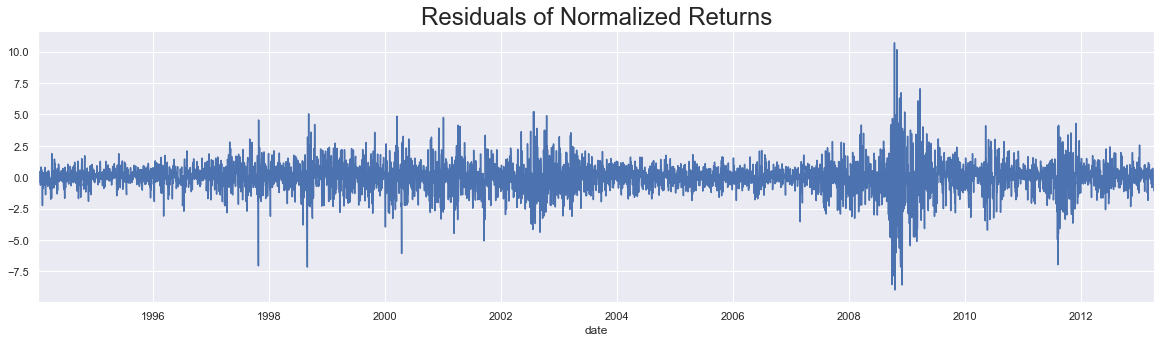

In [169]:
df.res_norm_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Normalized Returns", size = 24)
plt.show()

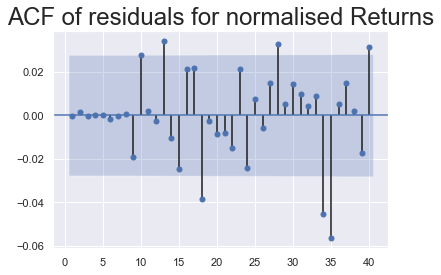

In [170]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF of residuals for normalised Returns", size = 24)
plt.show()

#### MA model for NON Stationary data (Prices): 

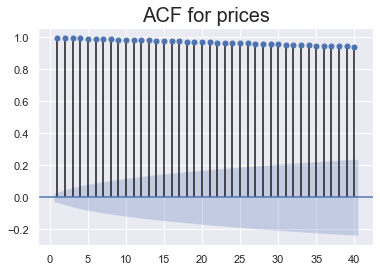

In [171]:
# Auto-regressive models are less reliable when estimating non-stationary data comparing the statinary data. Let's calculate how many lags we will include in this model....
sgt.plot_acf(df.Market_value, zero = False, lags = 40)
plt.title("ACF for prices", size = 20)
plt.show()

##### Sadly coefficient of all 40 lags seems to be significant. This suggest any higher lag model would be preffered over any lower lag one MA(P+1) > MA(p).
##### This lead us to believe that we have to use an infinte MA model to fit this data. Since no such thing exists, it seems no MA model would be good estimator. But we completely discredit these results , let's check different MA models separately ...

In [172]:
model_ma_1= ARMA(df.Market_value, order = (0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood              -32317.174
Method:                       css-mle   S.D. of innovations            151.179
Date:                Wed, 12 Jan 2022   AIC                          64640.347
Time:                        08:04:46   BIC                          64659.911
Sample:                    01-10-1994   HQIC                         64647.202
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1091.7607      4.202    259.814      0.000    1083.525    1099.997
ma.L1.Market_value     0.9696      0.003    363.247      0.000       0.964       0.975
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0314           +0.0000j            1.0314            0.5000
-----------------------------------------------------------------------------
"""

##### We see that one lag moving parameter is equal to 0.9573, this is incredibly close to 1 which means our models tries to keep almost the entire magnitude of the error term from the last period. one way to interpret this is time the model tries to predict the value it actually tries to maximize on the error from the last time.
##### Since this is the simple model of one lag , the error term contains all the information from the other lags. 

#### MA models are great in modelling Random walks because they take into account our mistakes.

##### MA aspect does that . also use the previous period's values ....

##### This means some combination of AR and MA models would be the best

#### Past Values and Past Mistakes in Time Series : 

##### Residuals(Et) not fully resembles White Noise.

#### AR Model: Make good model but failed to adjust quickly on sudden shocks
#### MA model : MA aspects smooth out predictions. MA model will account only for residuals.
#### Past Values AND Past Errors = ARMA (Auto-Regressive Moving - Average), solve the issues each one has individually.  

##### ARMA(1,1) : first value - Lagged values. Second value - Lagged Errors 
##### Actual Rt - Predicted R^t = How far off our predictions were ( calibrate expectations on the go).

#### ARMA :

##### Rt, RT-1 -> Values in the current period and 1 period ago respectively.
##### Et, Et-1 -> Error terms for the same two periods.
##### C -> Baseline constant factor
##### qi -> What part of the value last period is relevant in explaining the current one 
##### Qi(theta) -> what part of the error last period is relevant in explaining.
##### ARMA -> (AR, MA) <- 2 orders , So in ARMA(p,q) model , p takes perious value of P priods ago and also takes residuals upto q lags. p!=q <- Possible, but not mandatory.
##### Fitting a Simple ARMA model for returns ...

#### ARMA(1,1) : 

##### ARMA(time_series_name, order = (int_1, int_2))

In [173]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order = (1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(1, 1)   Log Likelihood               -8059.092
Method:                       css-mle   S.D. of innovations              1.205
Date:                Wed, 12 Jan 2022   AIC                          16126.183
Time:                        09:03:48   BIC                          16152.267
Sample:                    01-11-1994   HQIC                         16135.324
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0310      0.014      2.223      0.026       0.004       0.058
ar.L1.returns     0.6107      0.100      6.105      0.000       0.415       0.807
ma.L1.returns    -0.6814      0.093     -7.362      0.000      -0.863      -0.500
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6375           +0.0000j            1.6375            0.0000
MA.1            1.4676           +0.0000j            1.4676            0.0000
-----------------------------------------------------------------------------
"""

##### What we observe is tha AR L1 is positive and MA L1 is negative. Coefficient of over 75% suggest that there is a positive tendency between past and present values. Returns move in trends of consecutive positive or negative values Periods of persistent increases or decreases when translated to prices.
##### The negative MA coefficient is very hard to predict. This suggest that we should be moving away from the past period(t-1) values.
##### one possible explanation from financial point of view is these past error terms ensure we don't get a "Fool in the shower" type of error.
##### We want to prevent our targets from moving before we have accounted for them. 
##### Since ARMA(1,1) model is an extension of AR(1) and MA(1) model, so we should do log likelihood test to check it is better predictor or not

In [174]:
model_ret_ar_1= ARMA(df.returns[1:], order = (1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order = (0,1))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [175]:
print("\nARMA vs AR", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1)) #AR(1) -> degree of freedom # MA(1) -> degree of freedom
print("\nARMA vs MA", LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1)) # ARMA(1,1) -> degree of freedom -> 2 
# Default value of DF = 1 


ARMA vs AR 0.00019646567413838926

ARMA vs MA 0.0006506505578006802


##### Now, LLR test results with 0.00 end , this suggest that using past errors in conjuction with past values results in much better estimators.
##### Another way of interpretation is that our past estimators is better predictors than actual past values. Past estimators include both past values and past errors. 
##### ARMA models ought to performs well when forecasting values into the future. 

#### Fitting a Higher - lag ARMA model for Returns in Time Series : 

#### Over - Parametrized ARMA (p,q) : Here we will intially consider much lags and then will reduce it opposite to AR and MA model for lag selection/predictors.
##### we will select model which have 1. All coefficients significant 2. High Log - Likelihood 3. Low information criteria

#### Higher lag ARMA models : 

##### The AR and MA models complement one another -> The optimal ARMA model would contain fewer components of each type. 

In [180]:
model_ret_ar_4_ma_3 = ARMA(df.returns[1:], order = (4,3))
results_ret_ar_4_ma_3 = model_ret_ar_4_ma_3.fit()

In [181]:
LLR_test(model_ret_ar_1_ma_1, model_ret_ar_4_ma_3, DF = 5)

0.00024811469080513143

In [182]:
results_ret_ar_4_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                     ARMA(4, 3)   Log Likelihood               -8047.243
Method:                       css-mle   S.D. of innovations              1.202
Date:                Wed, 12 Jan 2022   AIC                          16112.485
Time:                        09:46:50   BIC                          16171.174
Sample:                    01-11-1994   HQIC                         16133.051
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0310      0.014      2.246      0.025       0.004       0.058
ar.L1.returns    -0.3964      0.102     -3.903      0.000      -0.595      -0.197
ar.L2.returns    -0.2585      0.121     -2.144      0.032      -0.495      -0.022
ar.L3.returns     0.6709      0.114      5.874      0.000       0.447       0.895
ar.L4.returns     0.0189      0.020      0.961      0.336      -0.020       0.057
ma.L1.returns     0.3224      0.100      3.210      0.001       0.126       0.519
ma.L2.returns     0.2007      0.107      1.877      0.060      -0.009       0.410
ma.L3.returns    -0.7395      0.100     -7.391      0.000      -0.936      -0.543
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5403           -0.8531j            1.0098           -0.3399
AR.2           -0.5403           +0.8531j            1.0098            0.3399
AR.3            1.4468           -0.0000j            1.4468           -0.0000
AR.4          -35.8784           -0.0000j           35.8784           -0.5000
MA.1           -0.5364           -0.8476j            1.0030           -0.3398
MA.2           -0.5364           +0.8476j            1.0030            0.3398
MA.3            1.3442           -0.0000j            1.3442           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# ARMA models are good estimator of stationary data 